In [2]:
import pandas as pd
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor


# importing data

In [5]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
bids = pd.read_csv("./data/bids.csv")

In [9]:
bids.groupby("bidder_id").count()

,bid_id,auction,merchandise,device,time,country,ip,url
bidder_id,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
002d229ffb247009810828f648afc2ef593rb,2,2,2,2,2,2,2,2
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,3,3,3,3,3,3
00486a11dff552c4bd7696265724ff81yeo9v,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...
ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,25075,25075,25075,25075,25075,25075,25075
ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,22,22,22,22,22,22,22
ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1,1,1,1,1,1


In [11]:
bids_unique= bids.groupby('bidder_id').nunique()
bids_unique = bids_unique.drop("bid_id",axis = 1)

In [12]:
join_result= train.merge(bids_unique, how= 'left', on = 'bidder_id')

In [14]:
join_result.fillna(0,inplace = True)

In [16]:
bids_df_count= bids.groupby("bidder_id")
counts= bids_df_count['url'].count().reset_index().rename(columns = {'url':'num_bids'})






In [17]:
new_train= join_result.merge(counts, how= 'left')

In [22]:
new_train.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'auction',
       'merchandise', 'device', 'time', 'country', 'ip', 'url', 'num_bids'],
      dtype='object')

In [32]:
new_train.fillna(0,inplace=True)

In [33]:
X = new_train.drop(columns=['bidder_id', 'payment_account', 'address', 'outcome','merchandise']) 
y = new_train['outcome']
# X_test_original = test.drop(columns=['bidder_id', 'payment_account', 'address', 'merchandise'])

In [34]:
scaler = StandardScaler()
# scaled_features = data.copy()
col_names = ['auction','device', 'time', 'country', 'ip', 'url', 'num_bids']

train_features = X[col_names]
scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)
X[col_names] = train_features

# splitting and training

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
def get_bias_var(tree, X_train, y_train, X_test, y_test, loss_type):
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train, y_train, X_test, y_test, loss=loss_type, random_seed=123)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    return


In [37]:
X_train

,auction,device,time,country,ip,url,num_bids
557,-0.414523,-0.409890,-0.134599,-0.519330,-0.139701,-0.127977,-0.104483
1063,-0.045658,-0.211564,-0.126536,0.166889,-0.126032,-0.115935,-0.099207
1873,-0.414523,-0.409890,-0.134389,-0.519330,-0.139701,-0.127601,-0.104346
1355,-0.400861,-0.399169,-0.134389,-0.476442,-0.139281,-0.127977,-0.104346
1309,-0.339384,-0.361648,-0.133342,-0.433553,-0.137598,-0.125719,-0.103661
...,...,...,...,...,...,...,...
1130,-0.414523,-0.409890,-0.134599,-0.519330,-0.139701,-0.127977,-0.104483
1294,-0.414523,-0.409890,-0.134599,-0.519330,-0.139701,-0.127977,-0.104483
860,-0.407692,-0.404530,-0.134389,-0.519330,-0.139281,-0.127601,-0.104346
1459,-0.161782,-0.367009,-0.125385,-0.261998,-0.130238,-0.127977,-0.098453


In [38]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# dt, pruned dt, rf comparisons

In [39]:
tree = DecisionTreeClassifier(random_state=42)
error_dt, bias_dt, var_dt = bias_variance_decomp(tree, X_train, y_train, X_test, y_test,'mse', random_seed=123)


In [40]:
tree_pruned = DecisionTreeClassifier(random_state=42, max_depth=2)
error_dt_pruned, bias_dt_pruned, var_dt_pruned = bias_variance_decomp(tree_pruned, X_train, y_train, X_test, y_test,'mse', random_seed=123)

In [41]:
print("variance Reduction:", str(np.round((var_dt_pruned/var_dt-1)*100,2)) + '%')
print("At the expense of introducing bias:", str(np.round((bias_dt_pruned/bias_dt-1)*100, 2)) + '%')

variance Reduction: -75.28%
At the expense of introducing bias: 12.44%


In [42]:
tree = DecisionTreeClassifier(random_state=42)
error_dt, bias_dt, var_dt = bias_variance_decomp(tree, X_train, y_train, X_test, y_test,'mse', random_seed=123)

tree_rf = RandomForestClassifier(random_state=42)
error_rf, bias_rf, var_rf = bias_variance_decomp(tree_rf, X_train, y_train, X_test, y_test,'mse', random_seed=123)

print("variance Reduction:", str(np.round((var_rf/var_dt-1)*100,2))+ '%')
print("At the expense of introducing bias:", str(np.round((bias_rf/bias_dt-1)*100, 2)) + '%')

variance Reduction: -71.0%
At the expense of introducing bias: 6.2%


In [43]:
print('Error for dt : ' + str(error_dt))
print('Bias for dt : ' + str(bias_dt))
print('Variance for dt : ' + str(var_dt))
print("****************************************************")
print('Error for pruned dt : ' + str(error_dt_pruned))
print('Bias for pruned dt : ' + str(bias_dt_pruned))
print('Variance for pruned dt : ' + str(var_dt_pruned))
print("****************************************************")
print('Error for rf : ' + str(error_rf))
print('Bias for rf : ' + str(bias_rf))
print('Variance for rf : ' + str(var_rf))

Error for dt : 0.062408940397350995
Bias for dt : 0.0326278559602649
Variance for dt : 0.029781084437086096
****************************************************
Error for pruned dt : 0.044048013245033116
Bias for pruned dt : 0.03668514072847682
Variance for pruned dt : 0.007362872516556291
****************************************************
Error for rf : 0.0432864238410596
Bias for rf : 0.034649958609271524
Variance for rf : 0.00863646523178808


Top 6 features controbute 95% of total feature importance: 0.947898531904547


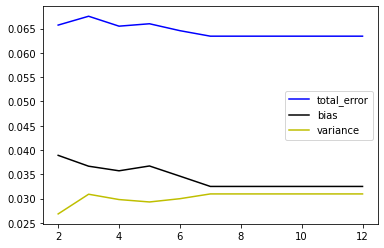

In [44]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
feat_array = tree.feature_importances_

df_feat = pd.DataFrame()
name_list, importance_list = [], []
for name, importance in zip(range(X_train.shape[1]), feat_array):
    name_list.append(name)
    importance_list.append(importance)
df_feat['name'] = name_list
df_feat['importance'] = importance_list

print("Top 6 features controbute 95% of total feature importance:", df_feat.sort_values(by = 'importance', ascending = False).head(6)['importance'].sum())

error_fs, bias_fs, var_fs  = [], [], []
feat_count = [2,3,4,5,6,7,8,9,10,11,12]
for feat in feat_count:
    top_feat = df_feat.sort_values(by = 'importance', ascending = False).head(feat)['name'].values
    X_train_fs = X_train[:, top_feat]
    X_test_fs = X_test[:, top_feat]
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train_fs, y_train, X_test_fs, y_test, loss='mse', random_seed=42)
    error_fs.append(avg_expected_loss)
    bias_fs.append(avg_bias)
    var_fs.append(avg_var)
    
plt.plot(feat_count, error_fs, 'b', label = 'total_error')
plt.plot(feat_count, bias_fs, 'k', label = 'bias')
plt.plot(feat_count, var_fs, 'y', label = 'variance')
plt.legend()

# dt sorted in feature importance

Top 6 features controbute 95% of total feature importance: 0.947898531904547


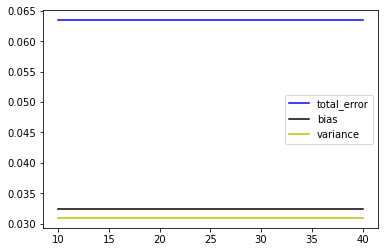

In [45]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
feat_array = tree.feature_importances_

df_feat = pd.DataFrame()
name_list, importance_list = [], []
for name, importance in zip(range(X_train.shape[1]), feat_array):
    name_list.append(name)
    importance_list.append(importance)
df_feat['name'] = name_list
df_feat['importance'] = importance_list

print("Top 6 features controbute 95% of total feature importance:", df_feat.sort_values(by = 'importance', ascending = False).head(6)['importance'].sum())

error_fs, bias_fs, var_fs  = [], [], []
feat_count = [10,15,20,25,30,35,40]
for feat in feat_count:
    top_feat = df_feat.sort_values(by = 'importance', ascending = False).head(feat)['name'].values
    X_train_fs = X_train[:, top_feat]
    X_test_fs = X_test[:, top_feat]
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train_fs, y_train, X_test_fs, y_test, loss='mse', random_seed=42)
    error_fs.append(avg_expected_loss)
    bias_fs.append(avg_bias)
    var_fs.append(avg_var)
    
plt.plot(feat_count, error_fs, 'b', label = 'total_error')
plt.plot(feat_count, bias_fs, 'k', label = 'bias')
plt.plot(feat_count, var_fs, 'y', label = 'variance')
plt.legend()

In [46]:
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.05)
error_reg, bias_reg, var_reg = bias_variance_decomp(lasso_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
error_no_reg, bias_no_reg, var_no_reg = bias_variance_decomp(linear_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
print("variance Reduction:", (var_reg/var_no_reg-1)*100)
print("At the expense of introducing bias:", (bias_reg/bias_no_reg-1)*100)

variance Reduction: -98.61529324397515
At the expense of introducing bias: 1.5349429316983576


# rf sorted in feature importance

Top 6 features controbute 95% of total feature importance: 0.8999934262472921


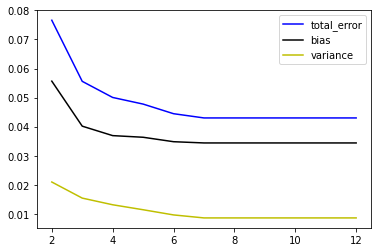

In [47]:
tree = RandomForestClassifier(random_state=42)
tree.fit(X_train, y_train)
feat_array = tree.feature_importances_

df_feat = pd.DataFrame()
name_list, importance_list = [], []
for name, importance in zip(range(X_train.shape[1]), feat_array):
    name_list.append(name)
    importance_list.append(importance)
df_feat['name'] = name_list
df_feat['importance'] = importance_list

print("Top 6 features controbute 95% of total feature importance:", df_feat.sort_values(by = 'importance', ascending = False).head(6)['importance'].sum())

error_fs, bias_fs, var_fs  = [], [], []
feat_count = [2,3,4,5,6,7,8,9,10,11,12]
for feat in feat_count:
    top_feat = df_feat.sort_values(by = 'importance', ascending = False).head(feat)['name'].values
    X_train_fs = X_train[:, top_feat]
    X_test_fs = X_test[:, top_feat]
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train_fs, y_train, X_test_fs, y_test, loss='mse', random_seed=42)
    error_fs.append(avg_expected_loss)
    bias_fs.append(avg_bias)
    var_fs.append(avg_var)
    
plt.plot(feat_count, error_fs, 'b', label = 'total_error')
plt.plot(feat_count, bias_fs, 'k', label = 'bias')
plt.plot(feat_count, var_fs, 'y', label = 'variance')
plt.legend()

# xgb sorted in feature importance

[12:52:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Top 6 features controbute 95% of total feature importance: 1.0
[12:52:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the 

[12:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:16] WARNING: /Users/runner/miniforge3/cond

[12:52:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:18] WARNING: /Users/runner/miniforge3/cond

[12:52:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:20] WARNING: /Users/runner/miniforge3/cond

[12:52:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:22] WARNING: /Users/runner/miniforge3/cond

[12:52:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:23] WARNING: /Users/runner/miniforge3/cond

[12:52:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:25] WARNING: /Users/runner/miniforge3/cond

[12:52:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:27] WARNING: /Users/runner/miniforge3/cond

[12:52:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:29] WARNING: /Users/runner/miniforge3/cond

[12:52:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:30] WARNING: /Users/runner/miniforge3/cond

[12:52:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:32] WARNING: /Users/runner/miniforge3/cond

[12:52:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:34] WARNING: /Users/runner/miniforge3/cond

[12:52:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:35] WARNING: /Users/runner/miniforge3/cond

[12:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:37] WARNING: /Users/runner/miniforge3/cond

[12:52:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:39] WARNING: /Users/runner/miniforge3/cond

[12:52:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:41] WARNING: /Users/runner/miniforge3/cond

[12:52:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:43] WARNING: /Users/runner/miniforge3/cond

[12:52:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:44] WARNING: /Users/runner/miniforge3/cond

[12:52:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:46] WARNING: /Users/runner/miniforge3/cond

[12:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:48] WARNING: /Users/runner/miniforge3/cond

[12:52:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:50] WARNING: /Users/runner/miniforge3/cond

[12:52:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:52] WARNING: /Users/runner/miniforge3/cond

[12:52:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:54] WARNING: /Users/runner/miniforge3/cond

[12:52:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:56] WARNING: /Users/runner/miniforge3/cond

[12:52:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:58] WARNING: /Users/runner/miniforge3/cond

[12:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:59] WARNING: /Users/runner/miniforge3/cond

[12:53:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:01] WARNING: /Users/runner/miniforge3/cond

[12:53:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:03] WARNING: /Users/runner/miniforge3/cond

[12:53:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:05] WARNING: /Users/runner/miniforge3/cond

[12:53:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:07] WARNING: /Users/runner/miniforge3/cond

[12:53:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:09] WARNING: /Users/runner/miniforge3/cond

[12:53:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:11] WARNING: /Users/runner/miniforge3/cond

[12:53:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:13] WARNING: /Users/runner/miniforge3/cond

[12:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:14] WARNING: /Users/runner/miniforge3/cond

[12:53:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:16] WARNING: /Users/runner/miniforge3/cond

[12:53:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:18] WARNING: /Users/runner/miniforge3/cond

[12:53:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:20] WARNING: /Users/runner/miniforge3/cond

[12:53:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:22] WARNING: /Users/runner/miniforge3/cond

[12:53:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:24] WARNING: /Users/runner/miniforge3/cond

[12:53:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:26] WARNING: /Users/runner/miniforge3/cond

[12:53:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:28] WARNING: /Users/runner/miniforge3/cond

[12:53:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:30] WARNING: /Users/runner/miniforge3/cond

[12:53:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:32] WARNING: /Users/runner/miniforge3/cond

[12:53:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:33] WARNING: /Users/runner/miniforge3/cond

[12:53:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:35] WARNING: /Users/runner/miniforge3/cond

[12:53:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:37] WARNING: /Users/runner/miniforge3/cond

[12:53:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:39] WARNING: /Users/runner/miniforge3/cond

[12:53:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:41] WARNING: /Users/runner/miniforge3/cond

[12:53:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:43] WARNING: /Users/runner/miniforge3/cond

[12:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:45] WARNING: /Users/runner/miniforge3/cond

[12:53:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:47] WARNING: /Users/runner/miniforge3/cond

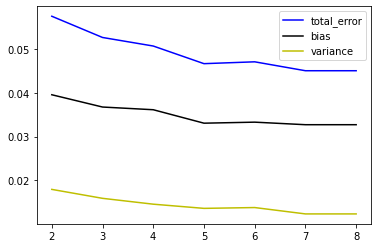

In [49]:
tree = XGBClassifier(random_state=42)
tree.fit(X_train, y_train)
feat_array = tree.feature_importances_

df_feat = pd.DataFrame()
name_list, importance_list = [], []
for name, importance in zip(range(X_train.shape[1]), feat_array):
    name_list.append(name)
    importance_list.append(importance)
df_feat['name'] = name_list
df_feat['importance'] = importance_list

print("Top 6 features controbute 95% of total feature importance:", df_feat.sort_values(by = 'importance', ascending = False).head(35)['importance'].sum())

error_fs, bias_fs, var_fs  = [], [], []
feat_count = [2, 3, 4, 5, 6,7,8]
for feat in feat_count:
    top_feat = df_feat.sort_values(by = 'importance', ascending = False).head(feat)['name'].values
    X_train_fs = X_train[:, top_feat]
    X_test_fs = X_test[:, top_feat]
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train_fs, y_train, X_test_fs, y_test, loss='mse', random_seed=42)
    error_fs.append(avg_expected_loss)
    bias_fs.append(avg_bias)
    var_fs.append(avg_var)
    
plt.plot(feat_count, error_fs, 'b', label = 'total_error')
plt.plot(feat_count, bias_fs, 'k', label = 'bias')
plt.plot(feat_count, var_fs, 'y', label = 'variance')
plt.legend()